## Homework 2
### Due: Thursday Feb. 13

**Integer vs floating point number**

Write a program to calculate and print the factorial of a
number.  If you wish you can base your program on the
user-defined function for factorial given in Section 2.6, but write your
program so that it calculates the factorial using *integer*
variables, not floating-point ones.  Use your program to calculate the
factorial of 200.

Now modify your program to use floating-point variables instead and again
calculate the factorial of 200.  What do you find?  Explain.

(20 points)

In [2]:
def factorial(n):
    num = 1
    while n >= 1:
        num = num * n
        n = n - 1 
    return num

def factorial_float(n):
    numm = 1.0
    while n >= 1:
        numm = numm * n
        n = n - 1
    return numm

print(f"The factor with integer variables is: {factorial(25)}")
print(f"The factor with floating-point variables is: {factorial_float(25)}")

The factor with integer variables is: 15511210043330985984000000
The factor with floating-point variables is: 1.5511210043330984e+25


For arbitrarily large values, floating point values carry limited precision when it comes to storing these values. They instead store them in scientific notation.

**A Simple Derivative**

Suppose we have a function $f(x)$ and we want to
calculate its derivative at a point $x$.  We can do that with pencil and
paper if we know the mathematical form of the function, or we can do it on
the computer by making use of the definition of the derivative:

<p style="text-align:center;">
${d f\over d x} = \lim_{\delta\to0} {f(x+\delta)-f(x)\over\delta}.$
</p>

On the computer we can't actually take the limit as $\delta$ goes to
zero, but we can get a reasonable approximation just by making $\delta$
small.
- Write a program that defines a function *f(x)* returning the
  value $x(x-1)$, then calculates the derivative of the function at the
  point $x=1$ using the formula above with $\delta=10^{-2}$.  Calculate
  the true value of the same derivative analytically and compare with the
  answer your program gives.  The two will not agree perfectly.  Why not?
- Repeat the calculation for $\delta=10^{-4}$, $10^{-6}$, $10^{-8}$,
  $10^{-10}$, $10^{-12}$, and $10^{-14}$.  You should see that the accuracy
  of the calculation initially gets better as $\delta$ gets smaller, but
  then gets worse again.  Why is this?

(20 points)

In [3]:
def f(x):
    return x*(x - 1)

def derivative_f(x):
    return 2 * x - 1
    

def limit(point, delta):
     
    return (f(point + delta) - f(point)) / delta

def analytically(point):
    
    return (derivative_f(point))

print(f"The derivative using limits is {limit(1, 10**(-2))}")
print(f"The derivative anlytically is {analytically(1)}")

print(f"The derivative using limits is {limit(1, 10**(-4))}")
print(f"The derivative using limits is {limit(1, 10**(-6))}")
print(f"The derivative using limits is {limit(1, 10**(-8))}")
print(f"The derivative using limits is {limit(1, 10**(-10))}")
print(f"The derivative using limits is {limit(1, 10**(-12))}")
print(f"The derivative using limits is {limit(1, 10**(-14))}")


The derivative using limits is 1.010000000000001
The derivative anlytically is 1
The derivative using limits is 1.0000999999998899
The derivative using limits is 1.0000009999177333
The derivative using limits is 1.0000000039225287
The derivative using limits is 1.000000082840371
The derivative using limits is 1.0000889005833413
The derivative using limits is 0.9992007221626509


### Simpson's Rule

- Write a program to calculate an approximate value for the integral $\int_{0}^{2} ( x^4 - 2x + 1)dx$ from Example 5.1 in the book, but using Simpson's rule with 10 slices instead of the trapezoid rule. You may be able to modify your code from the trapezoid rule to complete this task. Compare your result to the known correct value of 4.4. What is the fractional error on your calculation?

- Copy your code and modify it to use one hundred slices, then one thousand. Note the improvement in the result and compare to the results from the trapezoid rule.

(30 points)

In [4]:
def func(x):
    return x**4 - 2*x + 1

def simpson(a, b, n):
       
    h = (b - a) / n

    summation_even = 0
    summation_odd = 0
    
    for k in range(2, n - 1, 2):
        summation_even += func(a + k * h)
    
    for r in range(1, n, 2):
        summation_odd += func(a + r * h)
    
    
    return (1 / 3) * h * (func(a) + func(b) + 2 * (summation_even) + 4 * (summation_odd))


frac_error = abs(simpson(0, 2, 10) - 4.4) / 4.4

print(f"Our integral evaluates to {simpson(0, 2, 10)} using Simpson's rule, with a fractional error of {frac_error}")

             


Our integral evaluates to 4.400426666666667 using Simpson's rule, with a fractional error of 9.696969696972666e-05


### An Integral With No Analytic Solution

Consider the integral

$$ E(x) = \int_{0}^{x} \exp{-t^2} dt$$

- Write a program to calculate $E(x)$ for values of x from 0 to 3 in steps of 0.1. Choose for yourself what method you will use for performing the integral and a suitable number of slices.

- When you are convinced your program is working, extend it further to make a graph of E(x) as a function of x.

(30 points)

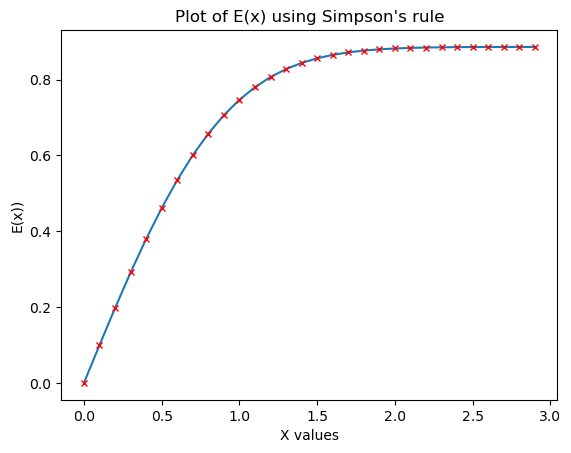

In [6]:
import numpy as np
from matplotlib import pyplot as plt



y_values = []
x_values = np.arange(0, 3.0, 0.1).tolist() 

def func(x):
    return np.exp(-x ** 2)


for i in np.arange(0, 3, 0.1):
    ans = simpson(0,i,100)
    y_values.append(ans)


plt.plot(x_values, y_values, markeredgecolor='red',marker='x', markersize=4)

plt.title("Plot of E(x) using Simpson's rule")
plt.xlabel("X values")
plt.ylabel("E(x))")

plt.show()

